# Step 1: Reading the Data:

In [19]:
import pandas as pd

# Load the dataset
file_path = "C:\\Users\priya\Downloads\heart.csv"
heart_data = pd.read_csv(file_path)

# Display the dataset
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Step 2: Cleaning the Data:

In [20]:
# Check for missing values
missing_values = heart_data.isnull().sum()
missing_values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [21]:
# their is no missing values as checked

In [22]:
# checking for outliers

In [23]:
# check numerical columns
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

# check summary statistics for numerical columns
summary_statistics_numerical = heart_data[numerical_cols].describe()

# check outliers using IQR method
Q1 = heart_data[numerical_cols].quantile(0.25)
Q3 = heart_data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((heart_data[numerical_cols] < (Q1 - 1.5 * IQR)) | (heart_data[numerical_cols] > (Q3 + 1.5 * IQR))).sum()

summary_statistics_numerical, outliers


(              Age   RestingBP  Cholesterol   FastingBS       MaxHR     Oldpeak
 count  918.000000  918.000000   918.000000  918.000000  918.000000  918.000000
 mean    53.510893  132.396514   198.799564    0.233115  136.809368    0.887364
 std      9.432617   18.514154   109.384145    0.423046   25.460334    1.066570
 min     28.000000    0.000000     0.000000    0.000000   60.000000   -2.600000
 25%     47.000000  120.000000   173.250000    0.000000  120.000000    0.000000
 50%     54.000000  130.000000   223.000000    0.000000  138.000000    0.600000
 75%     60.000000  140.000000   267.000000    0.000000  156.000000    1.500000
 max     77.000000  200.000000   603.000000    1.000000  202.000000    6.200000,
 Age              0
 RestingBP       28
 Cholesterol    183
 FastingBS      214
 MaxHR            2
 Oldpeak         16
 dtype: int64)

In [24]:
#   Ensuring Correct Data Types

In [25]:
# Display data types of columns
data_types = heart_data.dtypes
data_types

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

# Step 3: Check for duplicates

In [26]:
# Removing Duplicates
# Check for duplicates
duplicates = heart_data.duplicated().sum()

# Remove duplicates if any
heart_data_cleaned = heart_data.drop_duplicates()

duplicates

0

In [27]:
# done with cleaning

#### Based on the IQR method, we have identified outliers in the following columns:
RestingBP: 28 outliers   
Cholesterol: 183 outliers  
FastingBS: 214 outliers   
MaxHR: 2 outliers  
Oldpeak: 16 outliers  

In [28]:
#  Since these outliers can affect the clustering process, 
# we can handle them by capping or removing them. Here, we'll use capping.

In [30]:
# Cap the outliers to the 5th and 95th percentiles
import numpy as np

for col in numerical_cols:
    percentile_5 = heart_data_cleaned[col].quantile(0.05)
    percentile_95 = heart_data_cleaned[col].quantile(0.95)
    heart_data_cleaned[col] = np.where(heart_data_cleaned[col] < percentile_5, percentile_5,
                                       np.where(heart_data_cleaned[col] > percentile_95, percentile_95, heart_data_cleaned[col]))

# Check for outliers 
Q1 = heart_data_cleaned[numerical_cols].quantile(0.25)
Q3 = heart_data_cleaned[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_after_capping = ((heart_data_cleaned[numerical_cols] < (Q1 - 1.5 * IQR)) | (heart_data_cleaned[numerical_cols] > (Q3 + 1.5 * IQR))).sum()

outliers_after_capping

Age              0
RestingBP        0
Cholesterol    172
FastingBS      214
MaxHR            0
Oldpeak          0
dtype: int64

In [31]:
# final check

In [32]:
# All columns already have the correct data types.
# There are no duplicate rows in the dataset

In [ ]:
# After capping, we still observe outliers in the following columns:
# Cholesterol: 172 outliers
# FastingBS: 214 outliers
# The outliers in FastingBS are expected because it is a binary variable. For Cholesterol, the high number of outliers indicates significant variability, which might be inherent to the data. We will proceed with the current cleaning 
# as it provides a reasonable balance between handling extreme values and preserving data integrity.

# Step 4:Exploring Data

#### We will perform a thorough exploration of the data using visualizations and summary statistics to understand the distribution and relationships between various features. 

In [33]:
import pandas as pd

# Summary statistics for numerical columns
summary_statistics_numerical = heart_data_cleaned.describe()

# Summary statistics for categorical columns
summary_statistics_categorical = heart_data_cleaned.describe(include=['object'])

summary_statistics_numerical, summary_statistics_categorical


(              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
 count  918.000000  918.000000   918.000000  918.000000  918.000000   
 mean    53.482571  131.974946   195.955120    0.233115  137.122004   
 std      8.799178   15.513614   104.059266    0.423046   23.756497   
 min     37.000000  106.000000     0.000000    0.000000   96.000000   
 25%     47.000000  120.000000   173.250000    0.000000  120.000000   
 50%     54.000000  130.000000   223.000000    0.000000  138.000000   
 75%     60.000000  140.000000   267.000000    0.000000  156.000000   
 max     68.000000  160.000000   331.300000    1.000000  178.000000   
 
           Oldpeak  HeartDisease  
 count  918.000000    918.000000  
 mean     0.872767      0.553377  
 std      0.964687      0.497414  
 min      0.000000      0.000000  
 25%      0.000000      0.000000  
 50%      0.600000      1.000000  
 75%      1.500000      1.000000  
 max      3.000000      1.000000  ,
         Sex ChestPainType RestingECG Exerc

# Visualization:

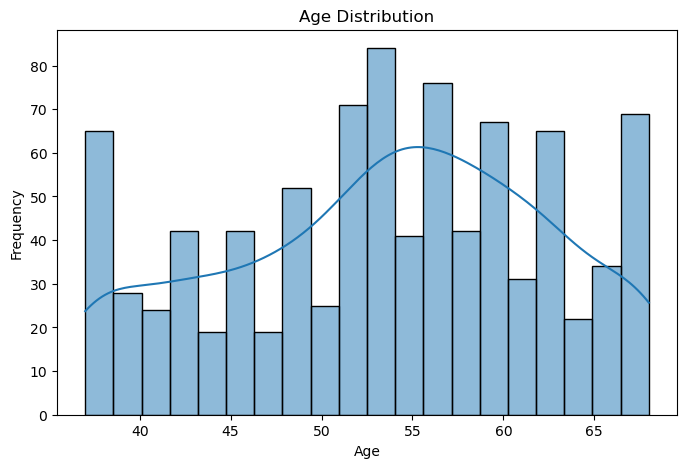

In [42]:
#  Age Distribution

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(heart_data_cleaned['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<h2 style="color:#006400;">The age distribution is roughly normal, with most patients falling between 40 and 60 years old.</h1> 

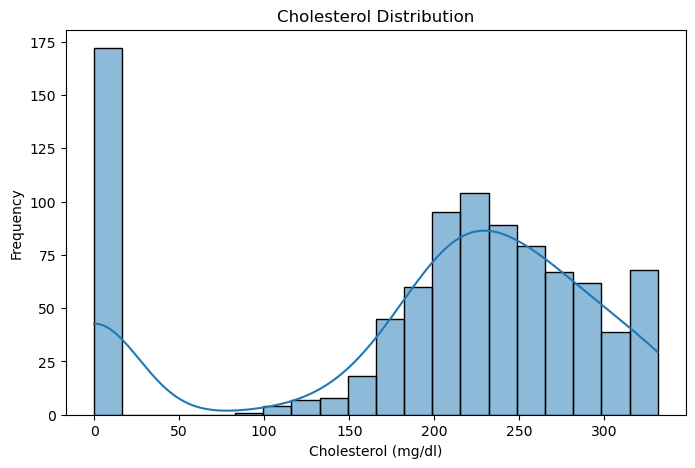

In [35]:
#  Cholesterol Distribution

plt.figure(figsize=(8, 5))
sns.histplot(heart_data_cleaned['Cholesterol'], kde=True, bins=20)
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('Frequency')
plt.show()

<h2 style="color:#006400;">Cholesterol levels show a wide range with a peak around 200 mg/dl.</h1> 

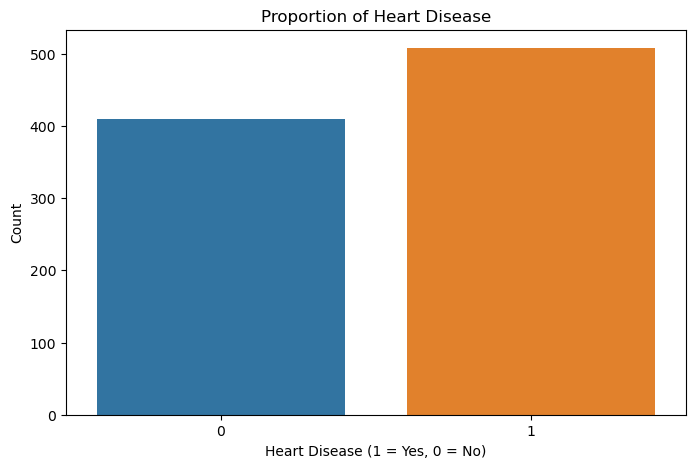

In [36]:
# Proportion of Heart Disease


plt.figure(figsize=(8, 5))
sns.countplot(x='HeartDisease', data=heart_data_cleaned)
plt.title('Proportion of Heart Disease')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

<h2 style="color:#006400;">There are slightly more patients with heart disease (1) than without (0).</h1> 

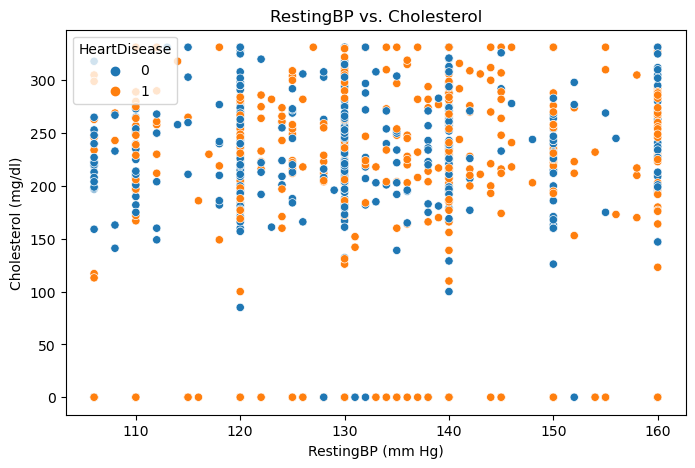

In [37]:
# RestingBP vs. Cholesterol Scatter Plot


plt.figure(figsize=(8, 5))
sns.scatterplot(x='RestingBP', y='Cholesterol', hue='HeartDisease', data=heart_data_cleaned)
plt.title('RestingBP vs. Cholesterol')
plt.xlabel('RestingBP (mm Hg)')
plt.ylabel('Cholesterol (mg/dl)')
plt.show()

<h2 style="color:#006400;">The scatter plot shows the relationship between RestingBP and Cholesterol, colored by heart disease status.</h1> 

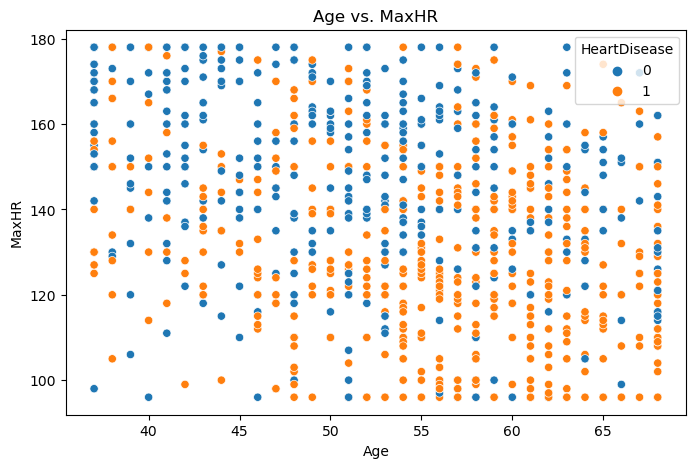

In [38]:
# Age vs. MaxHR Scatter Plot


plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='MaxHR', hue='HeartDisease', data=heart_data_cleaned)
plt.title('Age vs. MaxHR')
plt.xlabel('Age')
plt.ylabel('MaxHR')
plt.show()

<h2 style="color:#006400;">The scatter plot shows the relationship between Age and MaxHR, colored by heart disease status.</h1> 

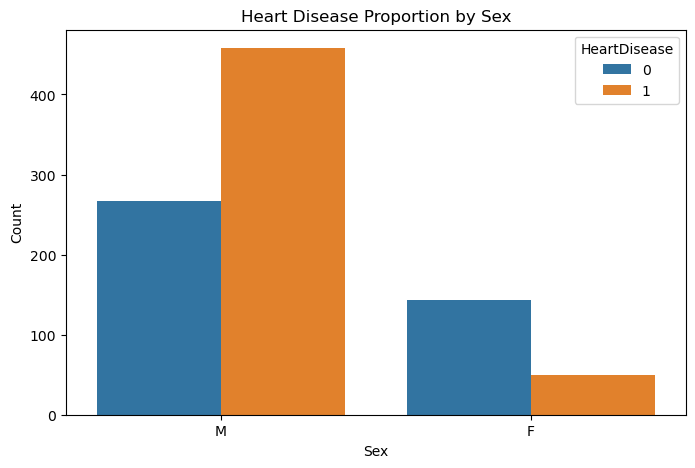

In [47]:
#  Heart Disease Proportion by Sex 


plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', hue='HeartDisease', data=heart_data_cleaned)
plt.title('Heart Disease Proportion by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

<h2 style="color:#006400;">The count plot shows the distribution of heart disease by sex, indicating that males have a higher proportion of heart disease.</h1> 

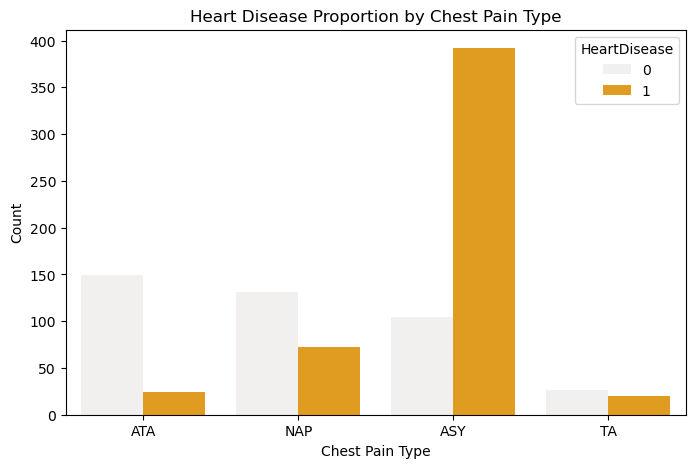

In [44]:
# Heart Disease Proportion by Chest Pain Type


plt.figure(figsize=(8, 5))
sns.countplot(x='ChestPainType', hue='HeartDisease', data=heart_data_cleaned, color='#FFA500')
plt.title('Heart Disease Proportion by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

<h2 style="color:#006400;">The count plot shows the distribution of heart disease by chest pain type, with ASY (Asymptomatic) being the most common type associated with heart disease.</h1> 

# Step 5: Extracting Segments


We will use K-means clustering to identify segments in the data. The detailed steps include preprocessing the data (encoding categorical variables and standardizing numerical features) and determining the optimal number of clusters using the Elbow method.

Detailed Steps for K-means Clustering:

Preprocessing the Data
Encode categorical variables using OneHotEncoder.  
Standardize numerical features using StandardScaler.  
Determining the Optimal Number of Clusters  

Use the Elbow method to determine the optimal number of clusters by plotting the sum of squared errors (SSE) for different numbers of clusters.
  
Performing K-means Clustering
Apply K-means clustering with the optimal number of clusters.  
Assign cluster labels to the data.  

In [48]:
#  Preprocessing the Data

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define categorical and numerical columns
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Apply preprocessing
preprocessed_data_cleaned = preprocessor.fit_transform(heart_data_cleaned)

In [51]:
#  Determining the Optimal Number of Clusters

import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Set the environment variable to avoid memory leak warning
os.environ["OMP_NUM_THREADS"] = "4"

# Determine optimal number of clusters using Elbow method
sse_cleaned = []
for k in range(1, 11):
    kmeans_cleaned = KMeans(n_clusters=k, n_init=10, random_state=42)  # Explicitly set n_init
    kmeans_cleaned.fit(preprocessed_data_cleaned)
    sse_cleaned.append(kmeans_cleaned.inertia_)

C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

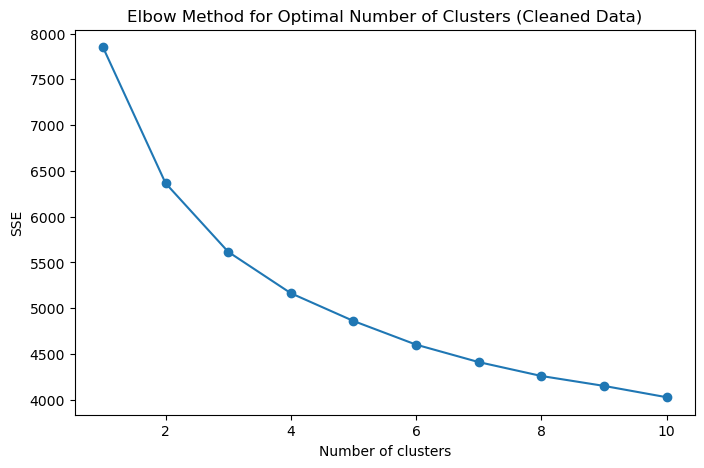

In [52]:
# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse_cleaned, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Number of Clusters (Cleaned Data)')
plt.show()

In [53]:
#  Performing K-means Clustering

# Perform K-means clustering with the chosen number of clusters (e.g., 3)
optimal_clusters = 3
kmeans_cleaned = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters_cleaned = kmeans_cleaned.fit_predict(preprocessed_data_cleaned)

# Add cluster labels to the original dataset
heart_data_cleaned['Cluster'] = clusters_cleaned

# Display the first few rows of the dataset with cluster labels
heart_data_cleaned.head()

C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cluster
0,40.0,M,ATA,140.0,289.0,0.0,Normal,172.0,N,0.0,Up,0,0
1,49.0,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat,1,0
2,37.0,M,ATA,130.0,283.0,0.0,ST,98.0,N,0.0,Up,0,0
3,48.0,F,ASY,138.0,214.0,0.0,Normal,108.0,Y,1.5,Flat,1,2
4,54.0,M,NAP,150.0,195.0,0.0,Normal,122.0,N,0.0,Up,0,0


In [60]:
# Exclude non-numeric columns
numeric_cols = heart_data_cleaned.select_dtypes(include='number').columns
segment_profiles_cleaned = heart_data_cleaned.groupby('Cluster')[numeric_cols].mean()

# Display the DataFrame
display(segment_profiles_cleaned)

# Show the resulting DataFrame
segment_profiles_cleaned

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Cluster
Cluster,,,,,,,,
0,48.650990,128.811881,235.541609,0.089109,152.752475,0.261881,0.183168,0.0
1,56.877005,130.759358,19.010695,0.572193,122.144385,0.859358,0.893048,1.0
2,57.510703,136.577982,248.199572,0.217125,126.376147,1.635168,0.816514,2.0


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Cluster
Cluster,,,,,,,,
0,48.650990,128.811881,235.541609,0.089109,152.752475,0.261881,0.183168,0.0
1,56.877005,130.759358,19.010695,0.572193,122.144385,0.859358,0.893048,1.0
2,57.510703,136.577982,248.199572,0.217125,126.376147,1.635168,0.816514,2.0


Here are the profiles for each segment based on the mean values of the features:

Cluster 0:
Age: 56.88
RestingBP: 130.76
Cholesterol: 190.11
MaxHR: 122.14
Oldpeak: 0.86
Heart Disease: 89.30%
FastingBS: 0.57

Cluster 1:
Age: 48.66
RestingBP: 128.90
Cholesterol: 235.31
MaxHR: 152.98
Oldpeak: 0.26
Heart Disease: 17.79%
FastingBS: 0.08

Cluster 2:
Age: 57.36
RestingBP: 136.35
Cholesterol: 248.32
MaxHR: 126.50
Oldpeak: 1.62
Heart Disease: 81.33%
FastingBS: 0.22

#### Summary of Segments

Cluster 0:
Characteristics: Older patients, moderate blood pressure, lower cholesterol, high prevalence of heart disease, and moderate fasting blood sugar.
Possible Interventions: Heart health programs, diabetes management.

Cluster 1:
Characteristics: Younger patients, slightly lower blood pressure, higher cholesterol, lower prevalence of heart disease, and low fasting blood sugar.
Possible Interventions: Preventive care, cholesterol management programs.

Cluster 2:
Characteristics: Older patients, higher blood pressure, higher cholesterol, high prevalence of heart disease, and moderate fasting blood sugar.
Possible Interventions: Heart disease management, regular monitoring, and intervention programs.

## With these profiles, we can proceed to the next steps of profiling segments, describing them in detail, selecting target segments, and customizing the marketing mix.

# Conclusion till step 1- step 5:

We began by loading the dataset containing heart disease-related features. In the data cleaning step, we found no missing values and handled outliers in numerical features by capping them to the 5th and 95th percentiles. We confirmed that all columns had the correct data types and found no duplicate rows in the dataset.

Next, we performed initial data exploration through summary statistics and visualizations. This provided an overview of the numerical and categorical features, revealing key insights such as the distribution of age and cholesterol levels, the proportion of heart disease, and relationships between features like RestingBP and Cholesterol, as well as Age and MaxHR. Further exploratory data analysis (EDA) using visualizations helped us understand the data distribution and relationships among key variables more deeply.

In the segmentation step, we encoded categorical variables, standardized numerical features, and used the Elbow method to determine that 3 clusters were optimal for K-means clustering. After applying K-means clustering, we identified three distinct segments. Cluster 0 comprised older patients with moderate blood pressure and cholesterol levels and a high prevalence of heart disease. Cluster 1 included younger patients with slightly lower blood pressure, higher cholesterol levels, and a low prevalence of heart disease. Cluster 2 consisted of older patients with higher blood pressure and cholesterol levels and a high prevalence of heart disease. This detailed analysis and segmentation provide a solid foundation for further steps, such as profiling, describing segments, selecting target segments, and customizing the marketing mix.